In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import librosa
from IPython.display import Audio


In [2]:
features = pd.read_csv(os.path.join("../","fma_metadata", "features.csv"), index_col=[0], header=[0,1,2])

In [3]:
tracks = pd.read_csv(os.path.join("../", "fma_metadata", "tracks.csv"), index_col=[0], header=[0,1])

In [4]:
genres = pd.read_csv(os.path.join("../", "fma_metadata", "genres.csv"))

In [5]:
genres.sort_values('#tracks')[-30:].head(10)

,genre_id,#tracks,parent,title,top_level
35,45,2469,12,Loud-Rock,12
40,58,2502,12,Psych-Rock,12
37,47,2546,38,Drone,38
92,183,2809,15,Glitch,15
104,247,2957,38,Musique Concrete,38
25,30,3237,38,Field Recordings,38
102,236,3472,15,IDM,15
53,85,3548,12,Garage,12
4,5,4106,0,Classical,5
3,4,4126,0,Jazz,4


Rock 12

Hiphop 21

Electronic 15

Folk 17

In [ ]:
AUDIO_DATA_PATH = '../../fma_small/'
mp3s = []
filenames = []
for genre in os.listdir(AUDIO_DATA_PATH):
    rel_path = AUDIO_DATA_PATH + genre
    if os.path.isdir(rel_path):
        mp3s += [int(bob.strip('.mp3')) for bob in os.listdir(rel_path)]
        filenames += [rel_path + '/' + bob for bob in os.listdir(rel_path)]
# all of the track ids that are in the small fma set

In [237]:
in_small_bool = features.index.isin(mp3s)
features = features[in_small_bool]
tracks = tracks[in_small_bool]

In [238]:
x, fs = librosa.load(filenames[0])

Audio(filenames[0])

In [ ]:

SAMPLE_SIZE = 400

tracks['Rock'] = tracks.track.genres.apply(lambda x: True if ('12' in x and '21' not in x and '15' not in x and '17' not in x) else False )
rock_feat = features[list(tracks['Rock'])].sample(SAMPLE_SIZE, random_state=0)
rock_feat['genre'] = 'Rock'

tracks['Hiphop'] = tracks.track.genres.apply(lambda x: True if ('12' not in x and '21' in x and '15' not in x and '17' not in x) else False )
hop_feat = features[list(tracks['Hiphop'])].sample(SAMPLE_SIZE, random_state=0)
hop_feat['genre'] = 'Hiphop'

tracks['Electronic'] = tracks.track.genres.apply(lambda x: True if ('12' not in x and '21' not in x and '15' in x and '17' not in x) else False )
elec_feat = features[list(tracks['Electronic'])].sample(SAMPLE_SIZE, random_state=0)
elec_feat['genre'] = 'Electronic'

tracks['Folk'] = tracks.track.genres.apply(lambda x: True if ('12' not in x and '21' not in x and '15' not in x and '17' in x) else False )
folk_feat = features[list(tracks['Folk'])].sample(SAMPLE_SIZE, random_state=0)
folk_feat['genre'] = 'Folk'

sampled_features = pd.concat([rock_feat, hop_feat, elec_feat, folk_feat])

In [205]:
sampled_features.to_csv('../data/sampled_features.csv', index = True)

In [100]:
sampled_features = pd.read_csv(os.path.join("../data/","sampled_features.csv"), index_col=[0], header=[0,1,2])

In [101]:
sampled_features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
32081        -0.149236  0.348979 -0.256342  0.818010 -0.754737  0.595361   
138317       -0.024289 -0.320302 -0.571483  0.589557 -0.790646  0.336780   
125817        0.568068 -0.857945  0.861216 -1.016349 -0.560541 -0.892692   
117172       -0.492603 -0.944479 -0.732962 -0.879166 -0.951663 -0.611848   
131789        0.107442  1.453892  0.412687  0.914714 -0.158467  0.807896   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        05        06   
track_id                                            ...                       
32081      -0.575464  0.118675 -1.128392 -1.013314  ...  0.021267  0.018633   
138317      1.850241  1.266195  0.189149 -0.537890  ...  0.021862  0.020002   
125817     -1.317466  2.829233 -1.598327 -1.633583  ...  0.034048  0.047383   
117172     -0.969072 -0.495137 -0.722001  0.253871  ...  0.029845  0.023364   
131789      2.293441  6.171995  0.721523  0.457123  ...  0.020036  0.019293   

feature           zcr                                                    \
statistics   kurtosis       max      mean    median       min      skew   
number             01        01        01        01        01        01   
track_id                                                                  
32081       27.748169  0.374023  0.057702  0.051270  0.000000  4.503321   
138317       8.863070  0.256836  0.058061  0.054199  0.011719  1.982626   
125817      97.155006  0.397949  0.014030  0.007812  0.002441  8.558769   
117172       5.088123  0.191406  0.029363  0.020020  0.002441  1.997258   
131789      16.671103  0.528320  0.050367  0.035156  0.000000  3.597306   

feature                             genre  
statistics       std Unnamed: 519_level_1  
number            01 Unnamed: 519_level_2  
track_id                                   
32081       0.037173                 Rock  
138317      0.024780                 Rock  
125817      0.024152                 Rock  
117172      0.024906                 Rock  
131789      0.052730                 Rock  

[5 rows x 519 columns]

In [102]:
zcr = sampled_features['zcr']['mean']

In [103]:
cqt = sampled_features['chroma_cqt']['mean'][['01','02','03','04','05']]

In [104]:
spect_cent = sampled_features['spectral_centroid']['mean']

In [105]:
mfcc = sampled_features['mfcc']['mean'][['01','02','03','04','05']]

In [106]:
features = pd.concat([zcr, cqt, spect_cent, mfcc], axis = 1)
col_names = [ 'zcr', 'cqt0', 'cqt1', 'cqt2', 'cqt3', 'cqt4', \
              'spec_cent', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4']
features.columns = col_names

In [107]:
features['genre'] = sampled_features['genre']

In [108]:
import umap.umap_ as umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
just_stats = features[col_names]

In [111]:
just_stats

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4
track_id,,,,,,,,,,,,
32081,0.057702,0.529531,0.499841,0.521039,0.533653,0.596229,1322.548340,-168.611328,150.510864,-42.042133,60.441593,-11.695156
138317,0.058061,0.538762,0.542281,0.551309,0.540180,0.600087,1220.237793,-110.392471,157.805649,-44.511337,37.518093,-10.147263
125817,0.014030,0.307532,0.288744,0.309664,0.317820,0.413866,412.163483,-369.393616,158.995499,57.744366,24.461973,20.091812
117172,0.029363,0.507552,0.452046,0.472171,0.507152,0.471840,693.699158,-410.308472,125.683067,17.940952,9.591949,15.241721
131789,0.050367,0.515940,0.684351,0.852430,0.607256,0.417200,1289.890503,-130.175446,147.221588,-11.299978,38.379189,-13.709072
...,...,...,...,...,...,...,...,...,...,...,...,...
53724,0.041031,0.546247,0.582478,0.651666,0.558632,0.487358,1045.115479,-257.471588,161.759949,-10.132042,21.434473,3.180220
66187,0.041213,0.406863,0.597226,0.439956,0.327308,0.291496,1016.037293,-162.378799,149.256790,-27.056784,29.019144,2.379569
88870,0.047524,0.527905,0.519631,0.421737,0.400464,0.451064,1166.134033,-126.331772,154.800766,-30.737333,28.715929,8.732830


In [112]:
scaled_stats = scaler.fit_transform(just_stats)

In [113]:
scaled_stats

array([[ 0.37025245,  0.26396734,  0.19908233, ..., -1.30384003,
         1.77553606, -1.21300455],
       [ 0.38442217,  0.3295917 ,  0.53766753, ..., -1.39068715,
         0.36412478, -1.09072071],
       [-1.35332273, -1.31439394, -1.48505666, ...,  2.20586204,
        -0.43974701,  1.29817108],
       ...,
       [-0.03141653,  0.25240763,  0.35696823, ..., -0.90622632,
        -0.17782883,  0.40080966],
       [ 0.50440827,  1.64419904,  1.15784128, ..., -0.80191235,
        -0.29781725, -0.74135567],
       [-0.83063537, -0.99456666,  0.06956994, ...,  1.0512116 ,
        -1.36166076,  0.84693731]])

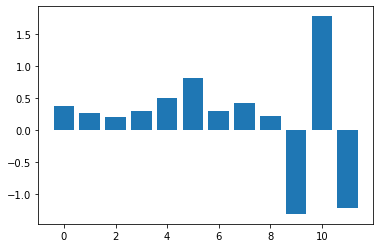

In [114]:
plt.bar(x=range(len(scaled_stats[0])), height=scaled_stats[0])
plt.show()

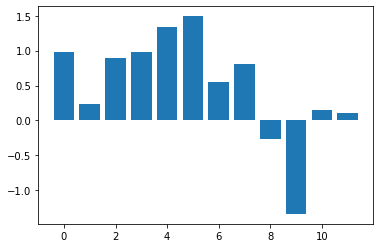

In [115]:
plt.bar(x=range(len(scaled_stats[11])), height=scaled_stats[11])
plt.show()

In [116]:
scaled_stats = pd.DataFrame(scaled_stats, columns = col_names, index = features.index)

In [117]:
scaled_stats['genre'] = features['genre']

In [118]:
scaled_stats

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,genre
track_id,,,,,,,,,,,,,
32081,0.370252,0.263967,0.199082,0.300393,0.497492,0.806820,0.295039,0.417621,0.226284,-1.303840,1.775536,-1.213005,Rock
138317,0.384422,0.329592,0.537668,0.520568,0.549931,0.834164,0.094603,1.080911,0.460520,-1.390687,0.364125,-1.090721,Rock
125817,-1.353323,-1.314394,-1.485057,-1.237120,-1.236457,-0.485637,-1.488490,-1.869900,0.498726,2.205862,-0.439747,1.298171,Rock
117172,-0.748183,0.107697,-0.182225,-0.055072,0.284593,-0.074762,-0.936935,-2.336045,-0.570938,0.805892,-1.355302,0.915013,Rock
131789,0.080772,0.167340,1.671109,2.710881,1.088805,-0.462008,0.231059,0.855522,0.120665,-0.222573,0.417143,-1.372104,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53724,-0.287675,0.382808,0.858359,1.250548,0.698171,0.035218,-0.248478,-0.594768,0.587492,-0.181495,-0.626152,-0.037847,Folk
66187,-0.280492,-0.608176,0.976018,-0.289398,-1.160231,-1.352909,-0.305445,0.488628,0.186015,-0.776774,-0.159160,-0.101099,Folk
88870,-0.031417,0.252408,0.356968,-0.421920,-0.572514,-0.222003,-0.011391,0.899314,0.364033,-0.906226,-0.177829,0.400810,Folk


In [119]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_stats.drop(['genre'], axis=1))
embedding.shape

(1600, 2)

In [120]:
scaled_stats['umap1'] = embedding[:,0]
scaled_stats['umap2'] = embedding[:,1]

In [121]:
scaled_stats.head()

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,genre,umap1,umap2
track_id,,,,,,,,,,,,,,,
32081,0.370252,0.263967,0.199082,0.300393,0.497492,0.806820,0.295039,0.417621,0.226284,-1.303840,1.775536,-1.213005,Rock,7.653301,5.874355
138317,0.384422,0.329592,0.537668,0.520568,0.549931,0.834164,0.094603,1.080911,0.460520,-1.390687,0.364125,-1.090721,Rock,7.629903,6.385676
125817,-1.353323,-1.314394,-1.485057,-1.237120,-1.236457,-0.485637,-1.488490,-1.869900,0.498726,2.205862,-0.439747,1.298171,Rock,0.810670,5.156771
117172,-0.748183,0.107697,-0.182225,-0.055072,0.284593,-0.074762,-0.936935,-2.336045,-0.570938,0.805892,-1.355302,0.915013,Rock,2.466237,5.782813
131789,0.080772,0.167340,1.671109,2.710881,1.088805,-0.462008,0.231059,0.855522,0.120665,-0.222573,0.417143,-1.372104,Rock,9.336435,6.391006


In [122]:
from sklearn.cluster import KMeans
for_clustering = scaled_stats[['umap1', 'umap2']]
for_clustering.head()

,umap1,umap2
track_id,,
32081,7.653301,5.874355
138317,7.629903,6.385676
125817,0.810670,5.156771
117172,2.466237,5.782813
131789,9.336435,6.391006


In [123]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(for_clustering)
scaled_stats['cluster'] = kmeans.labels_

In [124]:
groups = scaled_stats.groupby('cluster')
for name, group in groups:
    print("cluster num {}: {} items".format(name, len(group)))

cluster num 0: 451 items
cluster num 1: 382 items
cluster num 2: 331 items
cluster num 3: 436 items


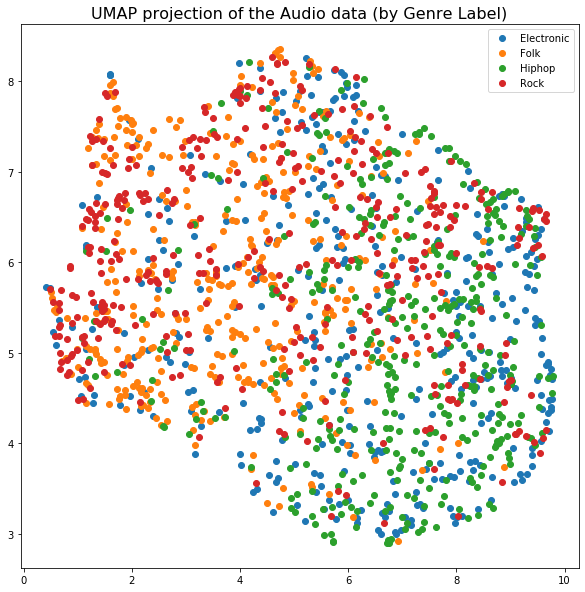

In [125]:
groups = scaled_stats.groupby('genre')
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.umap1, group.umap2, marker='o', linestyle='', label=name)
plt.title('UMAP projection of the Audio data (by Genre Label)', fontsize=16);
ax.legend()
plt.show()

In [126]:
reduced_data = for_clustering.to_numpy()

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

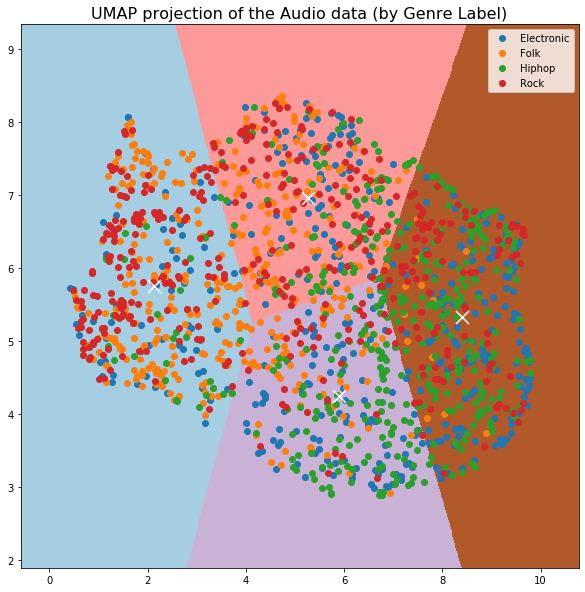

In [127]:
groups = scaled_stats.groupby('genre')
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

for name, group in groups:
    ax.plot(group.umap1, group.umap2, marker='o', linestyle='', label=name)
plt.title('UMAP projection of the Audio data (by Genre Label)', fontsize=16);
ax.legend()

# plt.show()

# mydf = pd.DataFrame(reduced_data,columns=['x','y'])
# mydf['label'] = labels
# mydf.plot.scatter(x='x',
#                       y='y',
#                       c='label')
#plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5, c=labels)


# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.legend(['Folk', 'Electronic', 'Rock', 'Hiphop'])
# plt.xticks(())
# plt.yticks(())
plt.show()

In [128]:
res_df = scaled_stats[['genre','umap1','umap2']]
res_df['track_id'] = res_df.index
# res_df['label'] = labels
# res_df["label"] = res_df["label"].astype(int)
# res_df["labelstr"] = res_df["label"].astype(str)
# res_df['label_alpha'] = scaled_stats.genre
res_df['new_label'] = kmeans.labels_
res_df['new_label'] = res_df['new_label'].astype(str)
res_df['x'] = res_df['umap1'] - min(res_df['umap1'])
res_df['x'] = res_df['x'] * (Z.shape[1]/ max(res_df['x']))
res_df['y'] = res_df['umap2'] - min(res_df['umap2'])
res_df['y'] = res_df['y'] * (Z.shape[0]/ max(res_df['y']))
#res_df.index = scaled_stats.index
res_df.head()

,genre,umap1,umap2,track_id,new_label,x,y
track_id,,,,,,,
32081,Rock,7.653301,5.874355,32081,3,439.331085,203.421494
138317,Rock,7.629903,6.385676,138317,3,437.911285,238.374924
125817,Rock,0.810670,5.156771,125817,0,24.129824,154.368103
117172,Rock,2.466237,5.782813,117172,0,124.587341,197.163757
131789,Rock,9.336435,6.391006,131789,3,541.461243,238.739288


In [129]:
import plotly.express as px
px.scatter(res_df, x="x", y="y", color="new_label", hover_name="track_id", hover_data=["genre"])